In [2]:
print('hello word')

hello word


# 기계학습 알고리즘 (MNIST)
## 1. 개발 환경 설정
  * 필수 Libery : numpy, matplot, sklearn, pandas
  * Minist 데이터 셋 분류 Project

## [] ML 학습 금주내 학습 완료 ( 삼성전자 데이터 분석 수행 )
## [] Signal 분석


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

D_train = mnist.data[:60000]
L_train = mnist.target[:60000]

D_test = mnist.data[60000:]
L_test = mnist.target[60000:]


KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

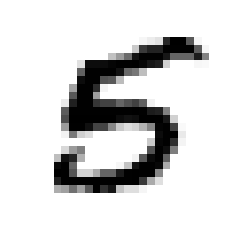

In [6]:
# Data ploting using matplot
import matplotlib
import matplotlib.pyplot as plt
x=D_train[20000]
x_digit_image=x.reshape(28,28)
plt.imshow(x_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show

# 머신러닝

## 지도학습, 비지도학습

   1. 지도학습(supevised learning) : label
      - k-NN
      - linear regression
      - logistic regression
      - support vector machine
      - Decision tree, Random Forest
      - Neural network

   2. 비지도학습 (unsupervised learning) : No label
      - Visualization, dimensionality reduction 
      - clustering 
      - Association rule learning
        

   3. 준지도학습 (semisupervised learning) : deep belief 

   4. 강화학습 : reward, penalty 기반 학슴 큰보상을 얻기 위해 Policy를 극대화 하는 방향성으로 학습

## 배치 학습 온라인학습
   1. 배치학습
      * 배치란 ??: https://losskatsu.github.io/machine-learning/epoch-batch/#1-%EC%82%AC%EC%A0%84%EC%A0%81-%EC%9D%98%EB%AF%B8
      * ex) 트레이닝 데이터 : 700개 -> 미니배치 100개 ; 배치사이즈 :100
            테스트데이터 300개
      * 에폭 (epoch) : 전체 트레이니 셋이 신경망을 통과하는 횟수 순전파와 역전파 통해 신경망을 한 번 통과했다는것 의미
      * iteration : 1-epoch 하기위해 소요되는 미니 배치 갯수; 1-epoch 마치는데 필요한 parameter update 횟수

   2. 온라인학습

## 사례 기반 학습 모델 기반 학습
   1. 사례기반 학습
      * 유사도 측정 기반 데이터 분류

   2. 모델기반 학습
      * 샘플 데이터 기반 모델 생성 -> 모델 학습
      * 모델을 평가히기 위한 평가함수
         utility function,  cost fuction 기반 최적 model parameter 산출 (Training)
   3. Learning process
      * step 1 : Data analysis
      * step 2 : Model selection
      * step 3 : Training
      * step 4 : prediction


## Classification
## 3.1 Minist


In [12]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

x,y = mnist['data'],mnist['target']
x.shape

(70000, 784)

In [13]:
y.shape
y=y.astype(np.int8) #

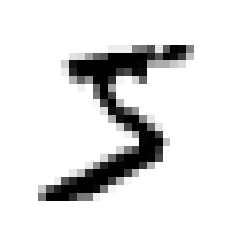

In [14]:
some_digit = x[0]
# reshape () 함수를 2차원 array로 변환
some_digit_image = some_digit.reshape(28,28)

import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [15]:
y[0]

5

In [16]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]# 트레이닝 세트 : 검증세트 구현 = 6:1

y_train_5 = (y_train == 5) # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

print (y_train_5)
print (X_train)


[ True False False ...  True False False]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(
    max_iter=1000, # 최대 반복횟수를 지정, 원래 기본값이 1000
    tol=1e-3, # tolerance값보다 모델이 향상되지 않으면 훈련을 멈추라는 종료 장치
    random_state=42)
# 위의 변수들이 다 default이기 때문에 
# SGDClassifier(random_state=42)랑 똑같다.
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

## 3.3 성능 측정


3.3.1 교차검증을 사용한 정확도 측정

## 3.4 다중 분류

- SGD 분류기, 랜덤 포레스트 분류기, 나이브베이즈 분류기 의 경우 여러개의 클래스를 직접 처리 가능
- 로지스틱 회긔 서포트 백터의 경우 이진분류만 가능 -> 이진 분류기를 여러개를 사용하여 다중클라스 분류가능


- 이진분류기 10개 훈련 시켜 숫자이미지 분류 시스템 제작 방법론
    * 각분류기에서 점수가 가장높은것을 선택 (One-versus the rest :OVR)
      - 세트 1개를 전체와 구별
      - e대부분 OVR 선호
    
    * 0 과 1 구별, 1과 2구별 각각의 조합마다 이진분류기 훈련 (One-versus one : OvO) 클래스가 N개 라면 ... 분류기 갯수 N x (N-1)/2 
      - 2개의 샘플수만 분류가능한 데이터만 전체 훈련세트중 구별할수 있는 두클래스에 해당하는 샘플만 필요
      - 작은훈련세트에서 만은 분류기를 훈련시키는쪽이 빠름 (SVM)

- #### 사이킷런에서는 OvR, OvO를 자동적으로 선택 해주기 때문에 추가작업은 필요 하지 않음 ... 기본 개념만 가져갈것

### 다중분류 예시

In [31]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=int8)

In [28]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

np.argmax(some_digit_scores)
svm_clf.classes_
svm_clf.classes_[5]

5

#### 사이킷런에서 OvO, OvR 강제설정 하고싶을때 ... OneVsOneClassifier 나 OneVsRestClassifier를 통해 데이터 운용이 가능

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier
#ovr_clf = OneVsRestClassifier(SVC())
#ovr_clf.fit(X_train,y_train)
#ovr_clf.predict([some_digit])